## **Flipkart Smart Mapper** 

### **Performing Data Identification, Acquisition, Filtering, Validation, Extraction and Cleaning**

Importing required files,

In [1]:
import pandas as pd
import regex as re
from operator import itemgetter
import string
import urllib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

There are 2 major datasets available (taken from data.world),


1.   E-Commerce dataset with 5.6 million entries (only 20,000 available for free)
2.   Fashion items only with 30,000 entries

For the current scope, we are working with fashion items only - but the approach can be extended



We start by working on both the datasets individually, and combining the necessary attributes

In [2]:
data = pd.read_json('https://github.com/sairam2661/datasets-public/blob/main/flipkart_fashion_products_dataset.json?raw=true')

In [3]:
data.head()

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [4]:
subdata = pd.read_csv('https://github.com/sairam2661/datasets-public/blob/main/flipkart_com-ecommerce_sample.csv?raw=true')

In [5]:
subdata.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [6]:
def for_fun(some_text):
  some_text = str(some_text)
  some_text = some_text.lower()
  if ('"women') in some_text:
    return 'women'
  elif ('"men') in some_text:
    return 'men'

In [7]:
subdata['gender'] = subdata['product_specifications'].apply(for_fun)

In [8]:
subdata['gender'].value_counts()

women    7762
men      3187
Name: gender, dtype: int64

{"product_specification"=>[{"key"=>"Occasion", "value"=>"Sports"}, {"key"=>"Ideal For", "value"=>"Men"}, {"key"=>"Tip Shape", "value"=>"Round"}, {"key"=>"Closure", "value"=>"Laced"}, {"key"=>"Sole Material", "value"=>"Rubber"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 1"}, {"key"=>"Weight", "value"=>"323 g (per single Shoe) - Weight of the product may vary depending on size."}, {"key"=>"Heel Height", "value"=>"0.9 inch"}, {"key"=>"Technology Used", "value"=>"Fluidride"}, {"key"=>"Outer Material", "value"=>"Mesh"}, {"key"=>"Color", "value"=>"Island Blue, Black, Indigo Blue"}, {"value"=>"1 Pair of shoes"}]}

In [9]:
testsub = subdata[subdata['gender'].isin(['men', 'women'])]

In [10]:
testsub.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,gender
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",women
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",women
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",women
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",women
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",...",women


In [11]:
testsub = testsub[['brand', 'description', 'product_specifications', 'product_name', 'product_url', 'product_category_tree', 'gender']]

In [12]:
data.columns

Index(['_id', 'actual_price', 'average_rating', 'brand', 'category',
       'crawled_at', 'description', 'discount', 'images', 'out_of_stock',
       'pid', 'product_details', 'seller', 'selling_price', 'sub_category',
       'title', 'url'],
      dtype='object')

Performing preprocessing for the 1st dataset,

In [13]:
def for_data_fun(some_text):
  some_text = str(some_text)
  some_text = some_text.lower()
  if ('-women-') in some_text and '-men-' in some_text:
    return 'both'
  elif ('-women-') in some_text:
    return 'women'
  elif ('-men-') in some_text:
    return 'men'

In [14]:
data['gender'] = data['url'].apply(for_data_fun)

In [15]:
data['gender'].value_counts()

men      27389
both        59
women        2
Name: gender, dtype: int64

In [16]:
data['title'].shape

(30000,)

In [17]:
data['title'].nunique()

4579

In [18]:
main_df = data.drop_duplicates(subset=['title'], keep='first')

In [19]:
main_df['gender'].value_counts()

men      4014
both       36
women       2
Name: gender, dtype: int64

We use a combination of matching procedures to identify the gender (if any) assosciated with the product,



In [20]:
testing = main_df.loc[~main_df['gender'].isin(['men', 'both', 'women'])]

In [21]:
def something_doing(some_text):
  some_text = str(some_text)
  some_text = some_text.lower()
  
  if('women') in some_text or ('woman') in some_text:
    return 'women'
  elif('men') in some_text or ('man') in some_text:
    return 'men'
  return None

In [22]:
testing['gender'] = testing['product_details'].apply(something_doing)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
final_testing = testing.loc[~testing['gender'].isin(['men', 'both', 'women'])]

In [24]:
final_testing['gender'] = final_testing['description'].apply(something_doing)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
final_testing.gender.value_counts()

men      34
women     3
Name: gender, dtype: int64

In [26]:
final_testing.loc[~final_testing['gender'].isin(['men', 'both', 'women'])]

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url,gender
1965,fd644360-e033-520d-bd8f-b52fa624b221,799,3.8,REEB,Clothing and Accessories,2021-02-10 20:31:11,Best for everyday wear Adjustable buckle closu...,9% off,[https://rukminim1.flixcart.com/image/128/128/...,True,CAPFHV4ACHNHAMDV,"[{'Fabric': '65% PES /35% CO-TWILL'}, {'Color'...",,720,Clothing Accessories,"Active Foundation Logo Cap (Pack of 1, White) Cap",https://www.flipkart.com/reebok-active-foundat...,None
2651,63709bd3-b174-591a-9562-4e53ef006d40,999,4.1,,Clothing and Accessories,2021-02-10 20:38:06,,50% off,[],False,CTPEFU9GRPG6AXY8,[{'Model Name': 'Golden Collar Bar With Remova...,TRIPIN,499,Clothing Accessories,Tripin Brass Tie Pin (Gold),https://www.flipkart.com/tripin-brass-tie-pin/...,None
2671,f16e6d1f-d9f6-50fc-a93e-0668081c0722,999,4.5,,Clothing and Accessories,2021-02-10 20:38:16,Classic Black And Silver Cufflinks Makes Your ...,50% off,[],False,CTPEFDVVRXGJDU6H,"[{'Model Name': '83'}, {'Style Code': 'TNAPZSI...",TRIPIN,499,Clothing Accessories,"Tripin Brass Cufflink (Silver, Black)",https://www.flipkart.com/tripin-brass-cufflink...,None
2679,56f68a2b-20bc-5117-b938-5f5cca258de7,999,,,Clothing and Accessories,2021-02-10 20:38:20,Classic Brown Colour Cufflinks,69% off,[],True,CTPEYQGRQRM2UJGZ,"[{'Model Name': 'Classic'}, {'Style Code': 'TS...",,300,Clothing Accessories,Tripin Brass Cufflink (Brown),https://www.flipkart.com/tripin-brass-cufflink...,None
2691,7c938773-894b-5507-9f1a-799c357043c7,999,,,Clothing and Accessories,2021-02-10 20:38:25,Classic Grey Colour Cufflinks,70% off,[],True,CTPEYQGRVY95ERXZ,"[{'Model Name': 'Classic'}, {'Style Code': 'TS...",,299,Clothing Accessories,Tripin Brass Cufflink (Grey),https://www.flipkart.com/tripin-brass-cufflink...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28133,c8dbcf42-43e1-5dfa-b2bd-9b56c0f30549,999,,TakeInCa,Clothing and Accessories,2021-02-11 01:13:37,,50% off,[],False,CAPEGX3EEBSDGBZ6,"[{'Fabric': 'Denim'}, {'Color': 'Blue'}, {'Sty...",TakeIncart(Not Enough Ratin,499,Clothing Accessories,Knitted Cap,https://www.flipkart.com/takeincart-knitted-ca...,None
28139,a4db4f9e-2248-5a20-92d1-317dc9307c53,"1,200",,TakeInCa,Clothing and Accessories,2021-02-11 01:13:40,,58% off,[https://rukminim1.flixcart.com/image/128/128/...,False,CAPEJGQFMJESQUQF,"[{'Fabric': 'Wool Blend'}, {'Color': 'Red'}, {...",TakeIncart(Not Enough Ratin,499,Clothing Accessories,Woollen Cap,https://www.flipkart.com/takeincart-woollen-ca...,None
28144,ffac5a5b-a8ee-5145-944d-078ffc28dd8b,"1,200",,TakeInCa,Clothing and Accessories,2021-02-11 01:13:42,Takeincart NY Red Beanie Solid 1 Snapback Cap,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,CAPECM8SWFAMMZ5K,"[{'Fabric': 'Polycotton'}, {'Color': 'Red'}, {...",TakeIncart(Not Enough Ratin,399,Clothing Accessories,Solid NY Red Beanie Cap,https://www.flipkart.com/takeincart-solid-ny-r...,None
28150,66de12e7-c5bb-5ecb-8e2e-5d534e5431c7,"1,000",,TakeInCa,Clothing and Accessories,2021-02-11 01:13:46,TakeInCart provides you best quality products....,65% off,[https://rukminim1.flixcart.com/image/128/128/...,False,CAPE3MVWGTGMCXEP,"[{'Fabric': 'Pure Wool'}, {'Color': 'Red, Blue...",TakeIncart(Not Enough Ratin,349,Clothing Accessories,Printed Woolen Cap,https://www.flipkart.com/takeincart-printed-wo...,None


In [27]:
final_testing = final_testing.dropna(axis=0, subset=['gender'])

In [28]:
final_testing.shape

(37, 18)

In [29]:
testing = testing.dropna(axis=0, subset=['gender'])

In [30]:
testing.shape

(391, 18)

In [31]:
main_df = main_df.dropna(axis=0, subset=['gender'])

In [32]:
main_df.shape

(4052, 18)

So, we have filtered out 1 dataset with the genders. We combine them now,

In [33]:
dfs = [main_df, testing, final_testing]

In [34]:
merged1 = pd.concat(dfs)

In [35]:
merged1.reset_index(inplace=True)

In [36]:
merged1.shape

(4480, 19)

Now we try to filter the 2nd dataset (only the free (20,000 entries) part was available),

In [37]:
subdata['product_name'].nunique()

12676

In [38]:
main_df = subdata.drop_duplicates(subset=['product_name'], keep='first')

In [39]:
main_df['gender'].value_counts()

women    4325
men      1920
Name: gender, dtype: int64

We use a combination of matching procedures to identify the gender (if any) assosciated with the product,



In [40]:
testing = main_df.loc[~main_df['gender'].isin(['men', 'both', 'women'])]

In [41]:
def something_doing(some_text):
  some_text = str(some_text)
  some_text = some_text.lower()
  
  if(('-women-') in some_text or ('-woman-') in some_text) and (('-men-') in some_text or ('-man-') in some_text):
    return 'both'
  elif('-men-') in some_text or ('-man-') in some_text:
    return 'men'
  elif('-women-') in some_text or ('-woman-') in some_text:
    return 'women'
  return None

In [42]:
testing.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,gender
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",None
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",None
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name...",None
12,c29af37837afcaf44b779eca7c19295f,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-tea...,Sicons All Purpose Tea Tree Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYYFETGCCD,NaN,NaN,"[""http://img6a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Tea Tree ...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",None
14,83c53f8948f508f51d2249b489ca8e7d,2016-03-25 22:59:23 +0000,http://www.flipkart.com/freelance-vacuum-bottl...,Freelance Vacuum Bottles 350 ml Bottle,"[""Pens & Stationery >> School Supplies >> Wate...",BOTEGYTZ2T6WUJMM,699.0,699.0,"[""http://img5a.flixcart.com/image/bottle/j/m/m...",False,Specifications of Freelance Vacuum Bottles 350...,No rating available,No rating available,Freelance,"{""product_specification""=>[{""key""=>""Body Mater...",None


In [43]:
testing['gender'] = testing['product_url'].apply(something_doing)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
testing.gender.value_counts()

men      25
women    22
both      4
Name: gender, dtype: int64

In [45]:
final_testing = testing.loc[~testing['gender'].isin(['men', 'both', 'women'])]

In [46]:
def something_doing(some_text):
  some_text = str(some_text)
  some_text = some_text.lower()
  some_text = some_text.split(' ')
  
  if('woman') in some_text or ('women') in some_text:
    return 'women'
  elif('man') in some_text or ('men') in some_text:
    return 'men'
  return None

In [47]:
final_testing['gender'] = final_testing['description'].apply(something_doing)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
final_testing.gender.value_counts()

women    135
men       43
Name: gender, dtype: int64

In [49]:
final_testing.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,gender
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",None
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",None
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name...",None
12,c29af37837afcaf44b779eca7c19295f,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-tea...,Sicons All Purpose Tea Tree Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYYFETGCCD,NaN,NaN,"[""http://img6a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Tea Tree ...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",None
14,83c53f8948f508f51d2249b489ca8e7d,2016-03-25 22:59:23 +0000,http://www.flipkart.com/freelance-vacuum-bottl...,Freelance Vacuum Bottles 350 ml Bottle,"[""Pens & Stationery >> School Supplies >> Wate...",BOTEGYTZ2T6WUJMM,699.0,699.0,"[""http://img5a.flixcart.com/image/bottle/j/m/m...",False,Specifications of Freelance Vacuum Bottles 350...,No rating available,No rating available,Freelance,"{""product_specification""=>[{""key""=>""Body Mater...",None


In [50]:
final_testing.loc[final_testing['gender'].isin(['men', 'both', 'women'])]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,gender
76,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",women
108,710ed5f2393a4b9e8823aa0029f71f93,2015-12-04 07:25:36 +0000,http://www.flipkart.com/tag-heuer-cau1116-ba08...,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,"[""Watches >> Wrist Watches >> TAG Heuer Wrist ...",WATEA6UGFGKZKDJC,107750.0,107750.0,"[""http://img5a.flixcart.com/image/watch/d/j/c/...",False,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",men
114,16655211772e017f8e207c24b8340214,2015-12-04 07:25:36 +0000,http://www.flipkart.com/costa-swiss-cs-2001-an...,"Costa Swiss CS-2001 Analog Watch - For Boys, Men","[""Watches >> Wrist Watches >> Costa Swiss Wris...",WATEBVHAWSYYS8EY,1199.0,429.0,"[""http://img6a.flixcart.com/image/watch/8/e/y/...",False,"Costa Swiss CS-2001 Analog Watch - For Boys, ...",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",men
134,08452abdadb3db1e686b94a9c52fc7b6,2015-12-04 07:25:36 +0000,http://www.flipkart.com/cartier-w6701005-analo...,"Cartier W6701005 Analog Watch - For Boys, Men","[""Watches >> Wrist Watches >> Cartier Wrist Wa...",WATEAK8SE2RUK7GM,201000.0,201000.0,"[""http://img6a.flixcart.com/image/watch/7/g/m/...",False,"Cartier W6701005 Analog Watch - For Boys, Men...",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",men
137,1e8741b5ae27a513546c94b3f3312aee,2015-12-04 07:25:36 +0000,http://www.flipkart.com/lois-caron-lcs-4032-an...,"Lois Caron LCS-4032 Analog Watch - For Boys, Men","[""Watches >> Wrist Watches >> Lois Caron Wrist...",WATED53FKKH4S8E4,1200.0,399.0,"[""http://img5a.flixcart.com/image/watch/8/e/4/...",False,"Lois Caron LCS-4032 Analog Watch - For Boys, ...",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va...",men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19399,6537eabee141f9c903fda503423451fb,2016-06-12 21:55:11 +0000,http://www.flipkart.com/raju-purse-collection-...,raju purse collection Shoulder Bag,"[""Bags, Wallets & Belts >> Bags >> Hand Bags >...",HMBEJKHKC7YSHUTB,499.0,499.0,"[""http://img6a.flixcart.com/image/hand-messeng...",False,Key Features of raju purse collection Shoulder...,No rating available,No rating available,raju purse collection,"{""product_specification""=>[{""key""=>""Closure"", ...",women
19400,80859babcef7c89e143f05e91463006f,2016-06-12 21:55:11 +0000,http://www.flipkart.com/all-day-365-shoulder-b...,ALL DAY 365 Shoulder Bag,"[""Bags, Wallets & Belts >> Bags >> Hand Bags >...",HMBEJJ5GZDSPV69C,999.0,499.0,"[""http://img6a.flixcart.com/image/hand-messeng...",False,Key Features of ALL DAY 365 Shoulder Bag Ideal...,No rating available,No rating available,ALL DAY 365,"{""product_specification""=>[{""key""=>""Closure"", ...",women
19401,6835eb1d99ef8ba9a5e3f4739782dc88,2016-06-12 21:55:11 +0000,http://www.flipkart.com/raju-purse-collection-...,Raju Purse Collection Shoulder Bag,"[""Bags, Wallets & Belts >> Bags >> Hand Bags >...",HMBEJKHYMFZKTZJ4,999.0,499.0,"[""http://img6a.flixcart.com/image/hand-messeng...",False,Key Features of Raju Purse Collection Shoulder...,No rating available,No rating available,Raju Purse Collection,"{""product_specification""=>[{""key""=>""Closure"", ...",women
19408,18c052a812c204463ef2f025b32a4

In [51]:
final_testing = final_testing.dropna(axis=0, subset=['gender'])

In [52]:
final_testing.shape

(178, 16)

In [53]:
testing = testing.dropna(axis=0, subset=['gender'])

In [54]:
testing.shape

(51, 16)

In [55]:
main_df = main_df.dropna(axis=0, subset=['gender'])

In [56]:
main_df.shape

(6245, 16)

Now we combine the second dataset,

In [57]:
dfs = [main_df, testing, final_testing]

In [58]:
merged2 = pd.concat(dfs)

In [59]:
merged2.reset_index(inplace=True)

In [60]:
merged2.head()

,index,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,gender
0,0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",women
1,2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",women
2,8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",...",women
3,10,e54bc0a7c3429da2ebef0b30331fe3d2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/ladela-bellies/p/itmeh...,Ladela Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4KM2W3Z6EH5,1724.0,950.0,"[""http://img5a.flixcart.com/image/shoe/s/g/m/b...",False,Key Features of Ladela Bellies Brand: LADELA C...,5,5,Ladela,"{""product_specification""=>[{""key""=>""Occasion"",...",women
4,11,c73e78fb440ff8972e0762daed4fc109,2016-03-25 22:59:23 +0000,http://www.flipkart.com/carrel-printed-women-s...,Carrel Printed Women's,"[""Clothing >> Women's Clothing >> Sports & Gym...",SWIEHF3EF5PZAZUY,2299.0,910.0,"[""http://img6a.flixcart.com/image/swimsuit/5/v...",False,Key Features of Carrel Printed Women's Fabric:...,No rating available,No rating available,Carrel,"{""product_specification""=>[{""key""=>""Neck"", ""va...",women


Combining the two dataframes, to create a document set that will be used for comparison,

In [61]:
merged2.rename(columns={'product_name':'title', 'product_category_tree':'category'}, inplace=True)

For the scope of this statement, we will drop:


> _id, actual_price, average_rating, crawled_at, discount, images, out_of_stock, pid, selling_price



In [62]:
drop_columns = ['_id', 'actual_price', 'average_rating', 'crawled_at', 'discount', 'images', 'out_of_stock', 'pid', 'selling_price']

In [63]:
data.drop(drop_columns, axis=1, inplace=True)

In [64]:
data['product_details'][1]

[{'Style Code': '1005BLUE'},
 {'Closure': 'Drawstring, Elastic'},
 {'Pockets': 'Side Pockets'},
 {'Fabric': 'Cotton Blend'},
 {'Pattern': 'Solid'},
 {'Color': 'Blue'}]

In [65]:
data.columns

Index(['brand', 'category', 'description', 'product_details', 'seller',
       'sub_category', 'title', 'url', 'gender'],
      dtype='object')

In [66]:
merged1.columns

Index(['index', '_id', 'actual_price', 'average_rating', 'brand', 'category',
       'crawled_at', 'description', 'discount', 'images', 'out_of_stock',
       'pid', 'product_details', 'seller', 'selling_price', 'sub_category',
       'title', 'url', 'gender'],
      dtype='object')

In [67]:
merged1.gender.value_counts()

men      4438
both       36
women       6
Name: gender, dtype: int64

In [68]:
merged2.gender.value_counts()

women    4482
men      1988
both        4
Name: gender, dtype: int64

Doing Preprocesing,

1.   Removing all irrelevant characters (Numbers and Punctuation)
2.   Convert all characters into lowercase
3.   Tokenization
4.   Removing Stopwords
5.   Stemming and Lemmatization
6.   Removing the words having length <=2
7.   Convert the list of tokens into back to the string


1. Removing irrelevant,

In [69]:
def remove_irrelevant(some_text):
  return re.sub('[^a-zA-Z]', ' ', some_text)

In [70]:
merged1.head()

,index,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url,gender
0,0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...,men
1,1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...,men
2,4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...,men
3,6,1b1d40cc-4eaa-54cf-8938-e59ecae5f19e,"1,499",3.8,York,Clothing and Accessories,2021-02-10 20:11:54,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFDABN3GXYPFHE,"[{'Style Code': '1005NAVI'}, {'Closure': 'Elas...",Shyam Enterprises,466,Bottomwear,Solid Men Dark Blue Track Pants,https://www.flipkart.com/yorker-solid-men-dark...,men
4,7,a33cf2e2-c5e4-5f06-b3aa-8f46a6fd1aef,"1,499",3.8,York,Clothing and Accessories,2021-02-10 20:11:55,Yorker trackpants made from 100% rich combed c...,63% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESGZYT8NH,"[{'Style Code': '1005DSKIN'}, {'Closure': 'Ela...",Shyam Enterprises,545,Bottomwear,Solid Men Beige Track Pants,https://www.flipkart.com/yorker-solid-men-beig...,men


2. Converting to lowercase,

In [71]:
def make_lowercase(some_text):
  some_text = str(some_text).lower()
  if 't shirt' in some_text:
    some_text = some_text.replace('t shirt', 'tshirt') #tshirt behaves as an exceptional case with t being identified as trivial by most preprocessing techniques
  return some_text

3. Tokenization,

In [72]:
import nltk
from nltk.tokenize import word_tokenize

In [73]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [74]:
def do_tokenization(some_text):
  return word_tokenize(some_text)

4. Removing stopwords,

In [75]:
from nltk.corpus import stopwords

In [76]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [77]:
stop_words = set(stopwords.words('english'))

In [78]:
def remove_stopwords(token):
  return [item for item in token if item not in stop_words]

5. Stemming and Lemmatization, (we go for Lemmatization)

In [79]:
from nltk.stem import WordNetLemmatizer

In [80]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [81]:
lemma = WordNetLemmatizer()

In [82]:
def do_lemmatization(token):
  return [lemma.lemmatize(word=w, pos='v') for w in token]

6. Removng words with length <=2,

In [83]:
def remove_small(token):
  return [i for i in token if len(i) > 2]

7. Convert back to String,

In [84]:
def convert_to_string(token):
  return ' '.join(token)

In [85]:
def do_cleaning():
  merged1['ntitle'] = merged1['title'].apply(remove_irrelevant)
  merged2['ntitle'] = merged2['title'].apply(remove_irrelevant)

  merged1['ntitle'] = merged1['ntitle'].apply(make_lowercase)
  merged2['ntitle'] = merged2['ntitle'].apply(make_lowercase)

  merged1['ntitle'] = merged1['ntitle'].apply(do_tokenization)
  merged2['ntitle'] = merged2['ntitle'].apply(do_tokenization)

  merged1['ntitle'] = merged1['ntitle'].apply(remove_stopwords)
  merged2['ntitle'] = merged2['ntitle'].apply(remove_stopwords)

  merged1['ntitle'] = merged1['ntitle'].apply(do_lemmatization)
  merged2['ntitle'] = merged2['ntitle'].apply(do_lemmatization)

  merged1['ntitle'] = merged1['ntitle'].apply(remove_small)
  merged2['ntitle'] = merged2['ntitle'].apply(remove_small)

  merged1['ntitle'] = merged1['ntitle'].apply(convert_to_string)
  merged2['ntitle'] = merged2['ntitle'].apply(convert_to_string)

In [86]:
def document_cleaning():
  document_list['title'] = document_list['title'].apply(remove_irrelevant)
  document_list['title'] = document_list['title'].apply(make_lowercase)
  document_list['title'] = document_list['title'].apply(do_tokenization)
  document_list['title'] = document_list['title'].apply(remove_stopwords)
  document_list['title'] = document_list['title'].apply(do_lemmatization)
  document_list['title'] = document_list['title'].apply(remove_small)
  document_list['title'] = document_list['title'].apply(convert_to_string)

In [87]:
do_cleaning()

Dropping old index,

In [88]:
merged1.drop('index', axis=1, inplace=True)

In [89]:
merged2.drop('index', axis=1, inplace=True)

Viewing the dataframes,

In [90]:
merged1.head(3)

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url,gender,ntitle
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...,men,solid men multicolor track pant
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...,men,solid men blue track pant
2,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...,men,solid men brown grey track pant


In [91]:
merged2.head(3)

,uniq_id,crawl_timestamp,product_url,title,category,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,gender,ntitle
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",women,alisha solid women cycle short
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",women,belly
2,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",...",women,dilli bazaaar belly corporate casuals casuals


Now we construct our corpus,

In [92]:
my_data = [merged1['title'], merged2['title']]

In [93]:
documents = pd.concat(my_data)

In [94]:
documents.head()

0     Solid Men Multicolor Track Pants
1           Solid Men Blue Track Pants
2    Solid Men Brown, Grey Track Pants
3      Solid Men Dark Blue Track Pants
4          Solid Men Beige Track Pants
Name: title, dtype: object

In [95]:
documents.shape

(10954,)

In [96]:
documents.nunique()

10954

In [97]:
documents = documents.drop_duplicates()

In [98]:
documents.shape

(10954,)

### **Construction of Smart Mapper**

In [99]:
document_list = pd.DataFrame(documents)

In [100]:
document_list

,title
0,Solid Men Multicolor Track Pants
1,Solid Men Blue Track Pants
2,"Solid Men Brown, Grey Track Pants"
3,Solid Men Dark Blue Track Pants
4,Solid Men Beige Track Pants
...,...
6469,raju purse collection Shoulder Bag
6470,ALL DAY 365 Shoulder Bag
6471,Raju Purse Collection Shoulder Bag
6472,GoWell Canvas Shoes


In [101]:
document_list[:3]

,title
0,Solid Men Multicolor Track Pants
1,Solid Men Blue Track Pants
2,"Solid Men Brown, Grey Track Pants"


In [102]:
document_cleaning()

For the purpose of constructing a smart, fast and lightweight mapper that would enable quick and accurate responses multiple approaches were considered, including:


1.   Natural Language Understanding (NLU) with BERT Emebeddings 
2.   Word2Vec, Doc2Vec sentence embeddings
3.   spaCy (small and big)
4.   Combination of multiple edit distances including Sørensen-Dice, Levenshtein and Needleman-Wunsch amongst many others
5.   A modified implementation of *Fuzzy Sysnets*, inspired from the [paper](https://doi.org/10.48550/ARXIV.2006.04042 )  

So, in our version we make use of Fuzzy Sysnets alongside the essence of Rule-based learning.



In [103]:
from nltk.corpus import wordnet

In [104]:
document_list.reset_index(inplace=True)

In [105]:
document_list.drop('index', axis=1, inplace=True)

In [106]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [108]:
word = wordnet.synsets('ladies')
print(len(word))

3


In [109]:
print([w.lemma_names() for w in word])

[['lady'], ['dame', 'madam', "ma'am", 'lady', 'gentlewoman'], ['Lady', 'noblewoman', 'peeress']]


In [110]:
for w in word:
  print(w.lemma_names())

['lady']
['dame', 'madam', "ma'am", 'lady', 'gentlewoman']
['Lady', 'noblewoman', 'peeress']


In [111]:
final_result = []
for i in document_list.title:
  lst = i.split(' ')
  result = []
  for word in lst:
    my_word = wordnet.synsets(word)
    if len(my_word) == 0:
      result.append(word)
      continue
    for inner_word in my_word:
      for x in inner_word.lemma_names():
        result.append(x)
  final_result.append(' '.join(result))

In [112]:
document_list['title'][0]

'solid men multicolor track pant'

In [113]:
final_result[0]

"solid solid solidness solid_state solid solid solid solid solid solid hearty satisfying solid square substantial solid strong substantial firm solid solid solid solid solid upstanding solid solid self-colored self-coloured solid unanimous whole work_force workforce manpower hands men man adult_male serviceman military_man man military_personnel man homo man human_being human man man valet valet_de_chambre gentleman gentleman's_gentleman man man Man Isle_of_Man man piece world human_race humanity humankind human_beings humans mankind man motley calico multicolor multi-color multicolour multi-colour multicolored multi-colored multicoloured multi-coloured painted particolored particoloured piebald pied varicolored varicoloured path track course lead track trail track racetrack racecourse raceway track cut track track caterpillar_track caterpillar_tread track data_track track track rail rails runway track cart_track cartroad track running track track chase chase_after trail tail tag give_

In [114]:
clothing_types = ['Outer wear', 'Active wear', 'Swimwear', 'Legwear', 'Neckwear', 'Shawls', 'Bridal', 'Pant', 'Undergarments', 'Uniform', 'Knit', 'Lounge', 'Shirts', 'Blouses', 'Bottoms', 'Sleep', 'Resort', 'Mourning', 'Afternoon', 'Afghan', 'line coat', 'line skirt', 'Apron', 'Ankle length Pants', 'Anklet', 'Apache Tie', 'Armband', 'Babushka', 'Baby Bonnet', 'Baby bunting', 'Baby doll dress', 'Baggy pants', 'Ball Gown', 'Balmacaan', 'Bandana', 'Ballerina skirt', 'Barfly apparel', 'Barn jacket', 'Basque waistline', 'Barrow coat', 'Bathing cap', 'Bathing suit', 'Bathrobe', 'Beach Pajamas', 'Bed Jacket', 'Bell bottom pants', 'Bell Boy Jacket', 'Belt', 'Bermuda Shorts', 'Bertha collar', 'Bias Slip', 'Bias skirt', 'Bike Tards', 'Bikini', 'Bishop sleeve', 'Bisht', 'Blazer', 'Bloomers', 'Blouse', 'Blouson', 'Bodycon dress', 'Bomber jacket', 'Bootcut', 'Boots', 'Bow Tie', 'Boxers', 'Boyshorts', 'Bow tie', 'Bra', 'Brassiere', 'KnickerSet', 'Bralette', 'Briefs', 'Burkha', 'Business suit', 'Bustier', 'Bustle', 'Button down shirt', 'Cap', 'Cape', 'Capri Pants', 'Cardigan', 'Cargos', 'Car coat', 'Circle skirt', 'Cloche', 'Cloak', 'Cocktail dress', 'Corset', 'Crew neck', 'Crop top', 'Cufflinks', 'Divided skirt', 'Doublet', 'Drape front', 'Dress', 'Dressing Gown', 'Dress Shirt', 'Dupatta', 'Flannel shirt', 'French pantyhose', 'Full Slips', 'Fur coat', 'Gaghra', 'Gartini', 'Gilet', 'Girdle', 'Gloves', 'G string', 'Hat', 'Hawaiian shirt', 'Hijab', 'Hipster', 'Hoody', 'House coat', 'Jacket', 'Jeans', 'Jeggings', 'Jumper', 'Kimono', 'Knee high socks', 'Knickers', 'Kurta', 'Leggings', 'Leg warmer', 'Lehanga', 'Lingerie', 'Lounge wear', 'Lounge pants', 'Maternity wear', 'Maxi', 'Mittens', 'Nightgown', 'Nightwear', 'Niqab', 'Oilskin clothing', 'Overalls', 'Overskirt', 'Padded Bra', 'Pajama', 'Panty', 'Pantyhose', 'Pencil skirt', 'Petticoat', 'Photo tshirts', 'Pleated skirts', 'Polo', 'Poet sleeve', 'Polo Shirt', 'Poncho', 'Pull on clothes', 'Pullover', 'Push up Bras', 'Pyjamas', 'Rain Coat', 'Robe', 'Running shorts', 'Sari', 'Saree', 'Sarong', 'Sash', 'Scarf', 'Shawl', 'Shervani', 'Shirt', 'Shorts', 'Slip', 'Ski Pants', 'Skirt', 'Socks', 'Stockings', 'Stole', 'Straight pants', 'Straight skirt', 'Suit', 'Summer Cardigan', 'Surplice', 'Suspenders', 'Swacket', 'Sweater', 'Sweatshirt', 'Sweats', 'Sweep train', 'Swimming Costume', 'Swimming Shorts', 'Swimming Trunks', 'Tap pants', 'T-Shirt', 'Tank top', 'Thong', 'Tie', 'Tiered skirt', 'Tights', 'Top', 'Toreador pants', 'Tracksuit', 'Trainers', 'Treggings', 'Trench Coat', 'Trousers', 'Trumpet skirt', 'Trousseau', 'Tulip hemmed skirt', 'Tummy shaper', 'Tunic', 'Turban', 'Turtleneck', 'Tuxedo Jacket', 'Tuxedo', 'Twin set', 'Ulster', 'Underwear', 'Uniform', 'Union suit', 'Unitard', 'Veil', 'Vest', 'Waistcoat', 'Watteau', 'Windsor Tie', 'Wrap around skirt', 'Whorts', 'Wind Pants', 'Wrap coat', 'Wylie coat', 'Yoga Pants', 'Zip front top']

In [115]:
#print(clothing_types)

In [116]:
def basic_cleaning(query):
  query = remove_irrelevant(query)
  query = make_lowercase(query)
  query = do_tokenization(query)
  query = remove_stopwords(query)
  query = do_lemmatization(query)
  query = remove_small(query)
  query = convert_to_string(query)
  return query

In [117]:
final_types = []

In [118]:
for clothing in clothing_types:
  clothing = basic_cleaning(clothing)
  if clothing not in final_types:
    final_types.append(clothing)

In [119]:
len(final_types)

224

In [120]:
# final_types.append('tshirt')

In [121]:
len(final_result[0])

1163

In [122]:
def calculate_score(query, term):
  query = query.split(' ')
  term = term.split(' ')
  temp_matches = set(final_types).intersection(set(query))
  matches = set(temp_matches).intersection(set(term))
  if len(matches) > 0:
    return 80
  else:
    return 0

In [123]:
def find_sim_fuzz(query, n):
  max_sim = 0
  results = []
  for x in range(len(final_result)):
    score = fuzz.token_set_ratio(query, final_result[x]) + calculate_score(query, final_result[x])
    results .append([score, x])
  result = sorted(results, key=itemgetter(0), reverse=True)
  final_results = []
  for x in result[:n]:
    final_results.append(document_list['title'][x[1]])
  return final_results

In [124]:
def fetch_results(result_term):
  n1 = merged1.loc[merged1['ntitle'] == result_term].shape[0]
  n2 = merged2.loc[merged2['ntitle'] == result_term].shape[0]

  if n1 > 0:
    category = list(merged1.loc[merged1['ntitle'] == result_term, 'category'])[0]
    description = list(merged1.loc[merged1['ntitle'] == result_term, 'description'])[0]
    gender = list(merged1.loc[merged1['ntitle'] == result_term, 'gender'])[0]
    sub_category = list(merged1.loc[merged1['ntitle'] == result_term, 'sub_category'])[0]
    title =  list(merged1.loc[merged1['ntitle'] == result_term, 'title'])[0]
    normal = list(merged1.loc[merged1['ntitle'] == result_term, 'actual_price'])[0]
    selling = list(merged1.loc[merged1['ntitle'] == result_term, 'selling_price'])[0]
    url = list(merged1.loc[merged1['ntitle'] == result_term, 'url'])[0]
    image = (list(merged1.loc[merged1['ntitle'] == result_term, 'images'])[0])
    image = image[0]

    category = string.capwords(category)
    description = string.capwords(description)
    gender = string.capwords(gender)
    sub_category = string.capwords(sub_category)
    title = string.capwords(title)

    print('Title: {}\nDescription: {}\nGender: {}\nCategory: {}\nSub-Category: {}\n\nMRP: Rs. {}\nDiscounted Price: Rs. {}\nLink: {}\n'.format(title, description, gender, category, sub_category, normal, selling, url))
    print()
    #Disp.Image(requests.get(image).content, height = 125)

    try:
      f = urllib.request.urlopen(image)
      figure(figsize=(2.5, 2.5), dpi=80)
      a = plt.imread(f, 0)
      plt.imshow(a)
      plt.axis('off')
      plt.show()
      print('\n')
    except:
      print("No image currently available")

  elif n2 > 0:
    category = list(merged2.loc[merged2['ntitle'] == result_term, 'category'])[0][2:-2]
    description = list(merged2.loc[merged2['ntitle'] == result_term, 'description'])[0]
    gender = list(merged2.loc[merged2['ntitle'] == result_term, 'gender'])[0]
    title =  list(merged2.loc[merged2['ntitle'] == result_term, 'title'])[0]
    normal = list(merged2.loc[merged2['ntitle'] == result_term, 'retail_price'])[0]
    selling = list(merged2.loc[merged2['ntitle'] == result_term, 'discounted_price'])[0]
    url = list(merged2.loc[merged2['ntitle'] == result_term, 'product_url'])[0]
    image = (list(merged2.loc[merged2['ntitle'] == result_term, 'image'])[0].split(','))
    image = str(image[0][2:-1])
    

    category = string.capwords(category)
    description = string.capwords(description)
    gender = string.capwords(gender)
    title = string.capwords(title)

    print('Title: {}\nDescription: {}\nGender: {}\nCategory: {}\n\nMRP: Rs. {}\nDiscounted Price: Rs. {}\nLink: {}\n'.format(title, description, gender, category, normal, selling, url))
    print()

    #Disp.Image(requests.get(image).content, height = 125)

    try:
      f = urllib.request.urlopen(image)
      figure(figsize=(2.5, 2.5), dpi=80)
      a = plt.imread(f, 0)
      plt.imshow(a)
      plt.axis('off')
      plt.show()
      print('\n')
    except:
      print("No image currently available")
  else:
    return 'Not Found!'

In [125]:
def get_top_results(query, n):
  print()
  print('Query: {}\n'.format(query))
  query = basic_cleaning(query)
  results = find_sim_fuzz(query, n)
  print("Displaying Top {} Results,\n".format(n))
  for result in range(0, len(results)):
    print("Result #{}\n".format(result + 1))
    fetch_results(results[result])

### **Smart Flipkart Mapper Demo**

Search Query: floral top
Number of Results: 5

Query: floral top

Displaying Top 5 Results,

Result #1

Title: Ausy Casual Short Sleeve Floral Print Women's Top
Description: Ausy Casual Short Sleeve Floral Print Women's Top - Buy Multicolor Ausy Casual Short Sleeve Floral Print Women's Top For Only Rs. 999 Online In India. Shop Online For Apparels. Huge Collection Of Branded Clothes Only At Flipkart.com
Gender: Women
Category: Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Ausy Tops

MRP: Rs. 999.0
Discounted Price: Rs. 367.0
Link: http://www.flipkart.com/ausy-casual-short-sleeve-floral-print-women-s-top/p/itmec8az27a8r6g2?pid=TOPEC8APK93YCFZZ




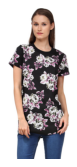



Result #2

Title: Tenn Casual, Party Sleeveless Floral Print Women's Top
Description: Tenn Casual, Party Sleeveless Floral Print Women's Top - Buy Multicolor Tenn Casual, Party Sleeveless Floral Print Women's Top For Only Rs. 2000 Online In India. Shop Online For Apparels. Huge Collection Of Branded Clothes Only At Flipkart.com
Gender: Women
Category: Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Tenn Tops

MRP: Rs. 2000.0
Discounted Price: Rs. 699.0
Link: http://www.flipkart.com/tenn-casual-party-sleeveless-floral-print-women-s-top/p/itmedm577fvcbjm9?pid=TOPEDM57CZDENHEG




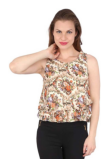



Result #3

Title: Maggie Party Sleeveless Floral Print Women's Top
Description: Maggie Party Sleeveless Floral Print Women's Top Price: Rs. 599 Add This White And Brown Colored Floral Printed Top By The Hub Of Maggie To Your Wardrobe, To Make It Look Trendier. Tailored From Hundred Percent Cotton Blend Net Material, This Party Wear Top Features Distinguished Design And Has A Fashionable Look. Wear This Top With Light Colored Slim Fit Denims Or Khaki Shorts For A Casual Vibe. This Top Has Sleeveless Adornment And High Neck Which Provide An Ease While Putting It On. Add This White And Brown Colored Floral Printed Top By The Hub Of Maggie To Your Wardrobe, To Make It Look Trendier. Tailored From Hundred Percent Cotton Blend Net Material, This Party Wear Top Features Distinguished Design And Has A Fashionable Look. Wear This Top With Light Colored Slim Fit Denims Or Khaki Shorts For A Casual Vibe. This Top Has Sleeveless Adornment And High Neck Which Provide An Ease While Putting It On.


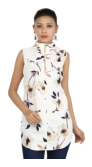



Result #4

Title: Retaaz Casual, Party, Festive Sleeveless Floral Print Women's Top
Description: Retaaz Casual, Party, Festive Sleeveless Floral Print Women's Top - Buy Red Retaaz Casual, Party, Festive Sleeveless Floral Print Women's Top For Only Rs. 2999 Online In India. Shop Online For Apparels. Huge Collection Of Branded Clothes Only At Flipkart.com
Gender: Women
Category: Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Retaaz Tops

MRP: Rs. 2999.0
Discounted Price: Rs. 829.0
Link: http://www.flipkart.com/retaaz-casual-party-festive-sleeveless-floral-print-women-s-top/p/itmedyhyq2yxpufu?pid=TOPEDYHYGWZS3YM6




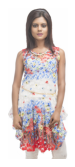



Result #5

Title: Ozel Studio Casual Full Sleeve Floral Print Women's Top
Description: Ozel Studio Casual Full Sleeve Floral Print Women's Top Price: Rs. 987 Mesh Sleeves Crop Top And A High Waist Skirt, The Black And White Makes It Look Extremely Feminine And Trendy. Wear It With Sleek Black Heels To Make It Look Sexier. Mesh Sleeves Crop Top And A High Waist Skirt, The Black And White Makes It Look Extremely Feminine And Trendy. Wear It With Sleek Black Heels To Make It Look Sexier.
Gender: Women
Category: Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Ozel Studio Tops

MRP: Rs. 1645.0
Discounted Price: Rs. 987.0
Link: http://www.flipkart.com/ozel-studio-casual-full-sleeve-floral-print-women-s-top/p/itme4vr5yxttedn2?pid=TOPE4VR5AVGTDWF5




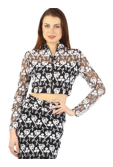

In [126]:
query = input("Search Query: ")
number_wanted = int(input("Number of Results: "))
get_top_results(query, number_wanted)

## **Additional methods tested** (Not modified for running)



### **1. NLU with BERT Embeddings**

In [ ]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu  pyspark==3.2.0 > /dev/null   

import nlu

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import numpy as np

In [ ]:
pipe = nlu.load('embed_sentence.bert')
# pipe = nlu.load('en.embed_sentence.bert_large_cased') # if you have some time and RAM try a big BERT model!
predictions = pipe.predict(document_list.title, output_level='document')
predictions

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]


,document,sentence_embedding_bert
0,solid men multicolor track pants,"[-0.5713103413581848, 0.9107413291931152, -0.6..."
1,solid men blue track pants,"[-0.7765612602233887, 0.7614292502403259, -0.5..."
2,solid men brown grey track pants,"[-0.32251080870628357, 0.7043192386627197, -0...."
3,solid men dark blue track pants,"[-0.3760356307029724, 0.23310720920562744, -0...."
4,solid men beige track pants,"[-0.459341436624527, 0.9614392518997192, -0.53..."
...,...,...
10227,good win takssport laptop backpack,"[-1.9636898040771484, 0.5111657977104187, -0.6..."
10228,goblin hurricane expandable check luggage,"[-0.6187362670898438, 0.8594528436660767, -1.1..."
10229,raju purse collection shoulder bag,"[-1.3699880838394165, 1.1911956071853638, -0.8..."
10230,day shoulder bag,"[-2.34853458404541, 0.972358763217926, -1.1453..."


In [ ]:
compare_len = document_list.shape[0]

In [ ]:
def get_sim_df_for_string(predictions,e_col, string_to_embed,pipe=pipe):
  # Creates a Dataframe which has a sim_score column which describes the similarity with the string_to_embed variable

  # put predictions vectors in matrix
  embed_mat = np.array([x for x in predictions[e_col]])

  # embed string input string
  embedding = pipe.predict(string_to_embed).iloc[0][e_col]

  # Replicate embedding for input string 
  m = np.array([embedding,]*len(document_list))
  sim_mat = cosine_similarity(m,embed_mat)

  #write sim score
  document_list['sim_score'] = sim_mat[0]


  return document_list

In [ ]:
document_list.head(3)

,title
0,solid men multicolor track pant
1,solid men blue track pant
2,solid men brown grey track pant


sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


(0.8, 1.0)

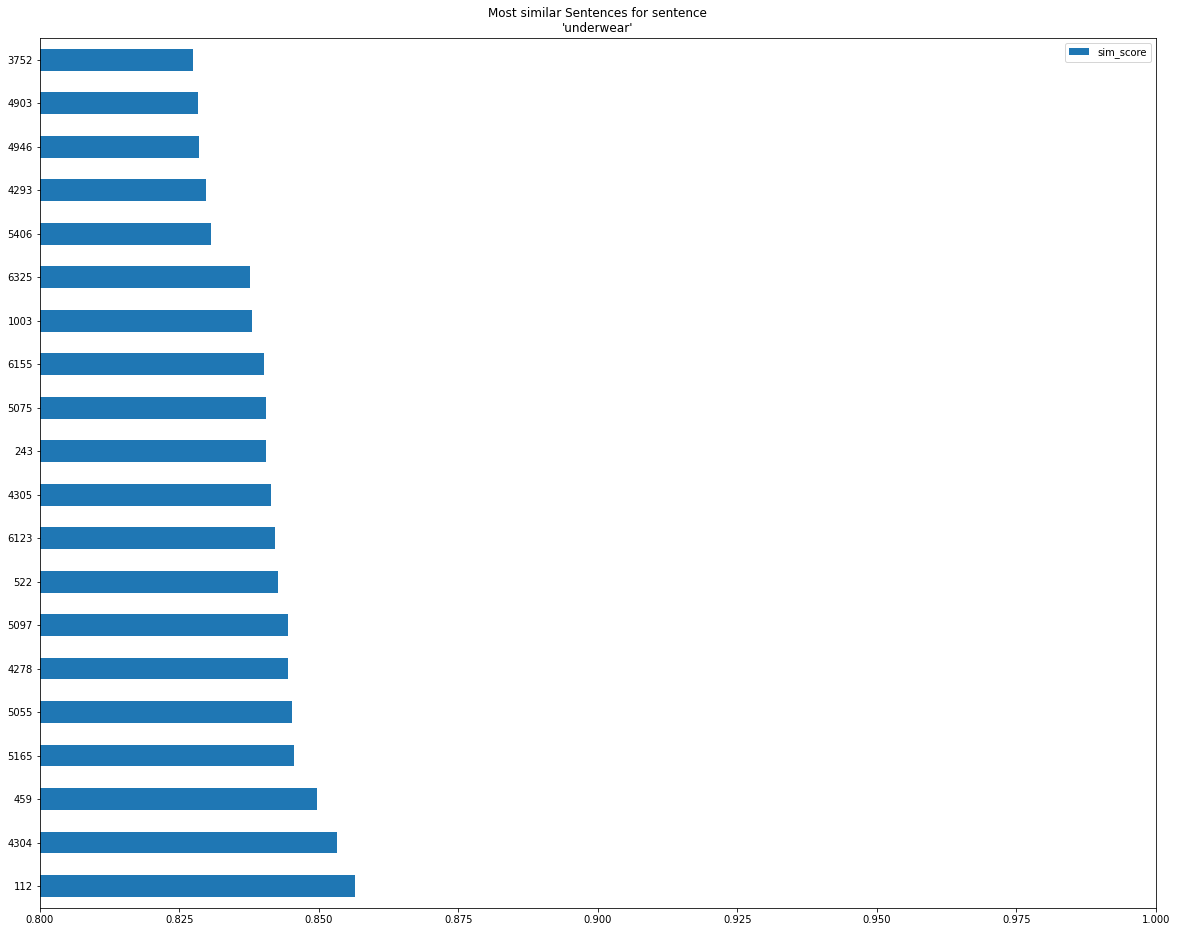

In [ ]:
query = 'underwear' 
sim_df = get_sim_df_for_string(predictions,'sentence_embedding_bert', query )
ax = sim_df.sort_values('sim_score', ascending = False).iloc[:20][['sim_score','title']].plot.barh(title = f"Most similar Sentences for sentence\n'{query}'", figsize=(20,16))
ax.set_xlim(0.8, 1)

In [ ]:
predictions.iloc[112,:1]

document    graphic print men round neck black shirt
Name: 112, dtype: object

In [ ]:
def basic_cleaning(query):
  query = remove_irrelevant(query)
  query = make_lowercase(query)
  query = do_tokenization(query)
  query = remove_stopwords(query)
  query = do_lemmatization(query)
  query = remove_small(query)
  query = convert_to_string(query)
  return query

In [ ]:
def get_similar_index(query):
  query = basic_cleaning(query)
  print('Query After Cleaning: {}'.format(query))
  sim_df = get_sim_df_for_string(predictions,'sentence_embedding_bert', query )
  sorted_df = sim_df.sort_values(by=['sim_score'], ascending=False)
  first, second, third = sorted_df.index[0], sorted_df.index[1], sorted_df.index[2]
  first_predict = predictions.iloc[first,0]
  second_predict = predictions.iloc[second,0]
  third_predict = predictions.iloc[third,0]

  return [first_predict, second_predict, third_predict]

In [ ]:
#predictions.iloc[4302,:1]

In [ ]:
def fetch_results(result_term):
  n1 = merged1.loc[merged1['title'] == result_term].shape[0]
  n2 = merged2.loc[merged2['title'] == result_term].shape[0]

  if n1 > 0:
    category = list(merged1.loc[merged1['title'] == result_term, 'category'])[0]
    description = list(merged1.loc[merged1['title'] == result_term, 'description'])[0]
    gender = list(merged1.loc[merged1['title'] == result_term, 'gender'])[0]
    sub_category = list(merged1.loc[merged1['title'] == result_term, 'sub_category'])[0]
    title =  list(merged1.loc[merged1['title'] == result_term, 'title'])[0]

    return 'Title: {}\nDescription: {}\nCategory: {}\nSub-Category: {}\nGender: {}\n'.format(title, description, category, sub_category, gender)

  elif n2 > 0:
    category = list(merged2.loc[merged2['title'] == result_term, 'category'])[0][2:-2]
    description = list(merged2.loc[merged2['title'] == result_term, 'description'])[0]
    gender = list(merged2.loc[merged2['title'] == result_term, 'gender'])[0]
    title =  list(merged2.loc[merged2['title'] == result_term, 'title'])[0]

    return 'Title: {}\nDescription: {}\nCategory: {}\nGender: {}\n'.format(title, description, category, gender)

  else:
    return 'Not Found!'

In [ ]:
def similarity_results(query):
  print('Search Query: {}'.format(query))
  title_list = get_similar_index(query)
  for title in title_list:
    print(fetch_results(title))

Testing sample cases,

In [ ]:
search_query = input()

track pants


In [ ]:
similarity_results(search_query)

Search Query: track pants
Query After Cleaning: track pant
Title: men printed cotton silk straight kurta beige
Description: 
Category: Clothing and Accessories
Sub-Category: Kurtas, Ethnic Sets and Bottoms
Gender: men

Title: freshme fashion jewellery rhodium plated zinc necklace
Description: Freshme Fashion Jewellery Rhodium Plated Zinc Necklace - Buy Freshme Fashion Jewellery Rhodium Plated Zinc Necklace only for Rs. 299 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!
Category: Jewellery >> Necklaces & Chains >> Necklaces
Gender: women

Title: superhero men round neck dark blue shirt
Description: Care Instructions: Ensure washing the tee in cold water, don't iron directly on the print and don't dry in direct sunlight. Instructions are printed on the neck label for your convenience. Fit Type: Regular Fit Material - These are 100% cotton t-shirt which are made of pre-shrunk cotton and are soft & smooth with a high thread-count. T

### **2. Spacy**

In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.0 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149854 sha256=904b7062baee181d9a348bb15c8ce9cf658b0b166614f678286787805de13db6
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
import spacy
from fuzzywuzzy import fuzz

In [ ]:
nlp_model = spacy.load('en_core_web_sm')

In [ ]:
max_sim = 0
the_index = 0

In [ ]:
query = input()

blouse


In [ ]:
document_list['title'][1]

1    solid men blue track pant
1                        belly
Name: title, dtype: object

In [ ]:
doc1 = nlp_model (query)
max_sim = 0
the_index = 0
for x in range(len(document_list['title'])):
  doc2 = nlp_model (document_list['title'][x])
  if doc1.similarity(doc2) > max_sim:
    max_sim = doc1.similarity(doc2)
    the_index = x
print('Index: {}'.format(the_index))
print('Sim Score: {}'.format(max_sim))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or us

Index: 7257
Sim Score: 0.6844185354316917


In [ ]:
document_list['title'][7257]

'senterlan'

In [ ]:
for x in range(len(document_list['title'])):
  if 'blouse' in document_list['title'][x]:
    print(document_list['title'][x])

pratami cotton silk blend solid blouse material
masterweaverindia cotton solid blouse material
masterweaverindia cotton woven blouse material
platinum cotton silk blend solid blouse material
jiya silk self design embroidered blouse material
purpleyou lace embellished blouse material
khoobee silk self design embroidered blouse material
indian house georgette solid blouse material
parisha silk embroidered blouse material
bunny sarees cotton embroidered blouse material
pratami silk solid blouse material
fashiondeal jacquard checkered blouse material
indian house jacquard self design blouse material
fashiondeal silk embroidered blouse material
awesome silk embroidered blouse material
fashiondeal cotton embroidered blouse material
purpleyou cotton embroidered blouse material
fashiondeal jacquard self design blouse material
indian house jacquard checkered blouse material
ugam chiffon self design blouse material
indian house cotton embroidered blouse material
orange jeans club cotton embroide

### 3. **doc2vec**

In [ ]:
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score

In [ ]:
my_texts = []

In [ ]:
for i in document_list.title:
  lst = i.split(' ')
  my_texts.append(lst)

In [ ]:
my_texts[:3]

[['solid', 'men', 'multicolor', 'track', 'pants'],
 ['solid', 'men', 'blue', 'track', 'pants'],
 ['solid', 'men', 'brown', 'grey', 'track', 'pants']]

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(my_texts)]

In [ ]:
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

### **4. Edit-distance based measures**

In [ ]:
#pip install pylev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pylev

def find_sim_levvy(query):
  max_sim = 0
  the_index = 0
  query = query.split(" ")
  for x in range(len(document_list['title'])):
    compare_term = document_list['title'][x].split(" ")
    if pylev.levenshtein(query, compare_term) > max_sim:
      max_sim = pylev.levenshtein(query, compare_term)
      the_index = x
  print('Sim: {}'.format(max_sim))
  print('Index: {}'.format(the_index))
  return document_list['title'][the_index]

In [ ]:
query = input()

pink shirt


In [ ]:
query = basic_cleaning(query)

In [ ]:
print('Query: {}'.format(query))
print(fetch_results(find_sim_levvy(query)))

Query: pink shirt
Sim: 40
Index: 9057
Title: jdk novelty brocade art silk organza floral print multi purpose fabric kurti fabric blouse material kurta fabric dress top material jacket fabric kurta pallazo material sherwani fabric kurta churidar material lace salwar suit material kurta patiyala material lehenga choli material
Description: Key Features of JDK NOVELTY Brocade, Art Silk, Organza Floral Print Multi-purpose Fabric, Kurti Fabric, Blouse Material, Kurta Fabric, Dress/Top Material, Jacket Fabric, Kurta & Pallazo Material, Sherwani Fabric, Kurta & Churidar Material, Lace, Salwar Suit Material, Kurta & Patiyala Material, Lehenga Choli Material Fancy Brocade fabric with black colour base and golden design Supreme Quality material Multipurpose fabric ideal for making kurti, blouse, kurta, jacket, jain pooja set Photography Variation: Please note that due to the ambient lighting during photography, screen resolution of camera or your computer, there might be a slight difference in c